<a href="https://colab.research.google.com/github/PhateTarun/Data-analysis/blob/master/data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import random
import  re    # importing regex
import requests
import urllib

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from prettytable import PrettyTable
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data1 = pd.read_csv('/content/drive/My Drive/data_engineering_assignment.txt',sep="\|",engine="python",names=["id","name","price","website_id","sku","url","brand","media","description_text"],
                error_bad_lines=False,na_filter=False, skiprows=2, warn_bad_lines=False)

## **Knowing** our data

In [0]:
data = data1
data.head(4)

id  ...                                   description_text
0  5d0b8aca0db7220b86cb4035  ...                           95% Cotton, 5% Elastane.
1  5d0b8aca0db7220b86cb4036  ...                                    100% Polyester.
2  5d0b8aca0db7220b86cb4037  ...  Nike Swim Boys' Solid Lap 4 Volley Short is a ...
3  5d0b8aca0db7220b86cb4038  ...                                        Height 85cm

[4 rows x 9 columns]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324581 entries, 0 to 324580
Data columns (total 9 columns):
id                  324581 non-null object
name                319362 non-null object
price               319362 non-null object
website_id          319362 non-null object
sku                 319362 non-null object
url                 319362 non-null object
brand               319362 non-null object
media               319362 non-null object
description_text    319362 non-null object
dtypes: object(9)
memory usage: 22.3+ MB


    as we can observe above there are 324581 entries in our data, with no null  values in coulmn id,
    except it all columns have some null values

In [0]:
# replacing all null values with empty string
data = data.dropna(how='any',axis=0)
data = data.reset_index(drop=True)
data.shape

(319362, 9)

In [0]:
# rechecking data for null 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319362 entries, 0 to 319361
Data columns (total 9 columns):
id                  319362 non-null object
name                319362 non-null object
price               319362 non-null object
website_id          319362 non-null object
sku                 319362 non-null object
url                 319362 non-null object
brand               319362 non-null object
media               319362 non-null object
description_text    319362 non-null object
dtypes: object(9)
memory usage: 21.9+ MB


# **Data** **Cleaning**

#### Cleaning **price** data

In [0]:
data['price'].head()

0    {'offer_price': {'currency': 'GBP', 'value': 3...
1    {'offer_price': {'currency': 'GBP', 'value': 2...
2    {'offer_price': {'currency': 'GBP', 'value': 1...
3    {'offer_price': {'currency': 'GBP', 'value': 1...
4    {'offer_price': {'currency': 'GBP', 'value': 5...
Name: price, dtype: object

In [0]:
# getting random samples from the data
for i in range(5):
    print(data.price[random.randint(0,len(data))])

{'offer_price': {'currency': 'GBP', 'value': 38.0}, 'regular_price': {'currency': 'GBP', 'value': 38.0}}
{'offer_price': {'currency': 'GBP', 'value': 20.0}, 'regular_price': {'currency': 'GBP', 'value': 20.0}}
{'offer_price': {'currency': 'GBP', 'value': 48.0}, 'regular_price': {'currency': 'GBP', 'value': 60.0}}
{'offer_price': {'currency': 'GBP', 'value': 14.0}, 'regular_price': {'currency': 'GBP', 'value': 24.99}}
{'offer_price': {'currency': 'GBP', 'value': 296.0}, 'regular_price': {'currency': 'GBP', 'value': 592.0}, 'basket_price': {'value': 301.0, 'currency': 'GBP'}}


    The above price data is in dictioanry format, with three different pricing 
    products, offer_price, regular_price, and basket_price 

In [0]:

offer_price, actual_price, basket_price, index=[],[],[],[]               # declaring 4 emplty list for pricing and index

for i , j in tqdm( zip( (data['price'].tolist()), range(len(data)) ) ):
    a = list(map(float, re.findall(r'\b\d+\.\d+\b', i)))
    if len(a)==0 or a[0]>a[1]:    # here a[0] represents offer_price, a[1] represents regular_price
        index.append(j)           #here j is iterating as an index to data, appending index which does'nt have price
    else:
        offer_price.append(a[0])
        actual_price.append(a[1])
        try:
            basket_price.append(a[2])  # a[2] represents basket price
        except IndexError:
            basket_price.append(a[0])
            continue
data=data.drop(index)         # droping rows without price data
data = data.reset_index(drop=True)

319362it [00:02, 142853.22it/s]


In [0]:
# adding extracted price_data to our data
data['offer_price'] = offer_price
data['actual_price'] = actual_price
data['basket_price'] = basket_price
data.drop(['price'],axis=1, inplace=True)
data.shape

(319012, 11)

#### Exploring **url**

In [0]:
# getting random samples from the data
for i in range(5):
    print(data.url[random.randint(0,len(data))])

https://www.asos.com/asos-design/asos-design-mini-double-compartment-satchel-cross-body-bag/prd/10014316?clr=tan
https://www.farfetch.com/uk/shopping/women/michael-michael-kors-medium-logo-satchel-item-14139885.aspx?storeid=11935
https://www.farfetch.com/uk/shopping/women/dsquared2-x-mert-and-marcus-printed-pouch-item-13846672.aspx?storeid=9336
https://www.farfetch.com/uk/shopping/women/d1-milano-a-co01-concrete-watch-item-12339521.aspx?storeid=10897
https://www.farfetch.com/uk/shopping/women/salvatore-ferragamo-studio-leather-tote-bag-item-13062065.aspx?storeid=10952


In [0]:
# defining valid url
valid_url = re.compile(r'^(?:http|ftp)s?://' # http:// or https://
    r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
    r'localhost|' #localhost...
    r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
    r'(?::\d+)?' # optional port
    r'(?:/?|[/?]\S+)$', re.IGNORECASE)

# getting index of all invalid urls
index = [i for i in range(len(data)) if re.match(valid_url, data['url'][i]) is None]
print("total invalid urls = ", len(index))

# discarding invalid urls
data=data.drop(index)
data = data.reset_index(drop=True)

total invalid urls =  18


#### Cleaning **Brand** **names**

In [0]:
# getting random samples from the data
for i in range(5):
    print(data.brand[random.randint(0,len(data))])

{'name': 'philippe model', 'sub_brand': ''}
{'name': 'models own', 'sub_brand': ''}
{'name': 'ugg', 'sub_brand': ''}
{'name': 'amiri', 'sub_brand': ''}
{'name': 'next', 'sub_brand': ''}


In [0]:
# extracting brand and sub-brand names from the data
brand_name=[]
sub_brand = []
for i in data['brand'].tolist():
    n = re.findall(r"\'(.*?)\'", i)
    brand_name.append(n[1])
    try:
        sub_brand.append(n[3])
    except:
        sub_brand.append(" ")

for i in range(5):
    print(i+1," ",brand_name[random.randint(0,len(data))])

1   maison margiela
2   next
3   tfnc tall
4   asos design
5   river island


#### Cleaning **product** **names**

In [0]:
data['name'].head()

0      Figleaves Cheetah Satin Pyjama Set
1                Nike Solid 4" Swim Short
2                  Collection Luxe Orchid
3    River Island White Sleeveless Blazer
4                 Faith Animal Print Heel
Name: name, dtype: object

In [0]:
# as we can observe above the product name contains some special symbols 
# therefore removing all the symbols from name
name = [(re.sub(r'[^\w]', ' ', i)).lower() for i in data['name'].tolist()]
data['name']=name
data['name'].head()

0      figleaves cheetah satin pyjama set
1                nike solid 4  swim short
2                  collection luxe orchid
3    river island white sleeveless blazer
4                 faith animal print heel
Name: name, dtype: object

    If we observe the above product names there are brand names included in the
    product name, if we remove the brand name from the product_name then it
    could be helpful in categorizing the product based on its name and 
    description.

In [0]:
# removing brand names from product name
product_name = []
data = data.reset_index(drop=True)
for i in range(len(data)):
    name_ = data.name[i]
    brand_name_ = brand_name[i]
    if  brand_name_ in name_:
        name_ = name_.replace(brand_name_, "")   # replacing brand_name with empty string
    product_name.append(name_)


In [0]:
data['product_name'] = product_name
data['brand_name']=[re.sub(" ", "_", i) for i in brand_name]
data['sub_brand'] = [re.sub(" ", "_", i) for i in sub_brand]
    

#### Cleaning **Description** **Text**

In [0]:
# getting random samples from the data
for i in range(5):
    print(data.description_text[random.randint(0,len(data))])

Smart thinking Concealed fly Functional pockets Striped design Check print It's hip to be square Tapered fit Cut loosely around the thigh and tapered from the knee to the ankle
Upgrade your wardrobe with this black tee from Nike. Crafted from pure cotton, this soft and comfy piece features a round neck, short sleeves, and is finished with a mammoth logo on the chest.
Antique gold-tone embellished cuff from Camila Klein featuring crystal embellishments and resin details.
Black wash Regular rise Button fly Functional pockets Skinny fit  Cut very closely to the body
Give your going 'out' out wardrobe a new go-to with this bodycon dress. Featuring a nude material with contrasting sequin embellishment, a plunging neckline and a zip fastening, team it with some strappy heels and hoop earrings for a look we're obsessing over.


In [0]:
# in description text we can observe special symbol as well as stop-word
# therefore removing symbol and stopwords
stop_words = set(stopwords.words('english'))
product_description = [(re.sub(r'[^\w]', ' ', i)).lower() for i in data['description_text'].tolist()]
for i in range(len(product_description)):
    text = ""
    for word in product_description[i].split():
        if word not in stop_words:
            text +=word+" "
    product_description[i] = text

data['product_description'] = product_description
data.drop(['brand', 'description_text'], axis=1, inplace=True)

In [0]:
# data after pre processing all the text data
data.head(3)

id  ...                                product_description
0  5d0b8aca0db7220b86cb4036  ...                                     100 polyester 
1  5d0b8aca0db7220b86cb4037  ...  nike swim boys solid lap 4 volley short dual p...
2  5d0b8aca0db7220b86cb4038  ...                                       height 85cm 

[3 rows x 13 columns]

# **Exploratory** Data Analysis

In [0]:
# getting all unique websites 
website_count = Counter(data['website_id'].tolist())

# getting website name corresponding to id
website_name={}
for i in website_count.keys():
    a = data.url[data['website_id'] == i].tolist()
    a = re.findall(r"www\.(.*?)/", a[0])
    website_name[i] = a[0]

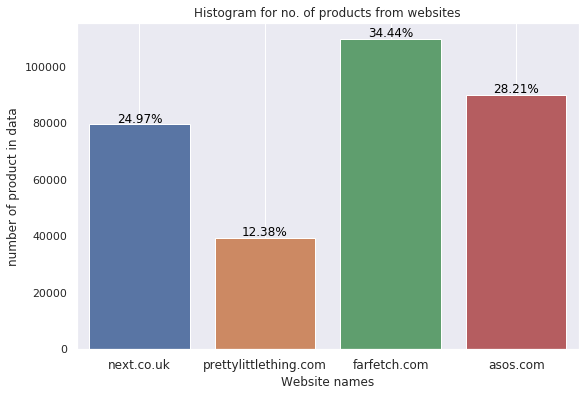

In [0]:
plt.figure(figsize=(9,6))
sns.set(style='darkgrid')
ax =sns.barplot(list(range(len(website_count))), list(website_count.values()))   
for p  in (ax.patches) :
    ax.annotate( "%.2f%%" %(100*p.get_height()/len(data)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')
plt.xticks(range(len(website_name)),list(website_name.values()), fontsize=12)
plt.title("Histogram for no. of products from websites")
plt.xlabel("Website names", fontsize=12)
plt.ylabel("number of product in data", fontsize=12, labelpad=5)
plt.grid()
plt.show()
plt.close()

In [0]:
# getting how many products are on offer for each site
offer_count= dict.fromkeys(website_name, 0)

data = data.reset_index(drop=True)
for i in list(offer_count.keys()):
    d = data.loc[data['website_id']==i][data['offer_price']<data['actual_price']]
    offer_count[i] = len(d)


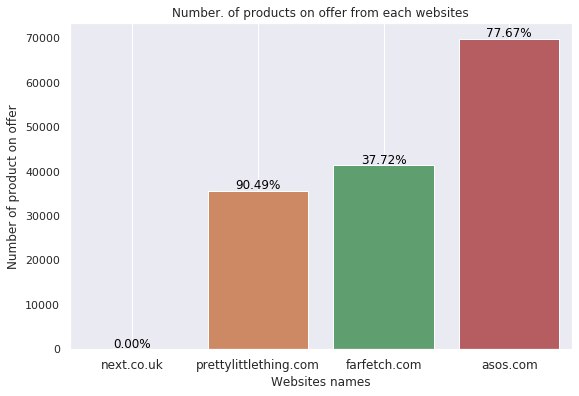


			Website name and there corresponding % of product on offer
+--------------------------+-----------------------+----------------+-------------------+---------+
|        website_id        |      Website name     | Total products | Products on offer | Percent |
+--------------------------+-----------------------+----------------+-------------------+---------+
| 5cff5e7fe40f4900046735fa |       next.co.uk      |     79651      |         0         |   0.0   |
| 5cff5e30e40f4900046735f8 | prettylittlething.com |     39483      |       35730       |  90.49  |
| 5d0cc7b68a66a100014acdb0 |      farfetch.com     |     109871     |       41446       |  37.72  |
| 5bc055046264490004432328 |        asos.com       |     89989      |       69897       |  77.67  |
+--------------------------+-----------------------+----------------+-------------------+---------+


In [0]:
plt.figure(figsize=(9,6))
ax = sns.barplot(list(range(len(offer_count))), list(offer_count.values()))
for p ,l in zip(ax.patches, list(website_count.values())) :
    ax.annotate( "%.2f%%" %(100*p.get_height()/l), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')
plt.xticks(range(len(website_name)),list(website_name.values()), fontsize=12)
plt.title("Number. of products on offer from each websites")
plt.xlabel("Websites names", fontsize=12, linespacing=20)
plt.ylabel("Number of product on offer", fontsize=12, labelpad=5)
plt.grid()
plt.show()
plt.close()

y = PrettyTable()
y.field_names = ['website_id',"Website name","Total products", "Products on offer", "Percent"]
for i in list(website_count.keys()):
    y.add_row([i,website_name[i], website_count[i],offer_count[i], round(100*offer_count[i]/website_count[i],2)])
print("\n\t\t\tWebsite name and there corresponding % of product on offer")
print(y)

    Looking at the above plots and table we can clearly see 
    asos.com is offering most of the discount (69897 products).
    while next.co.uk has none of its product on offer.

# Analyzing **website pricing** there **offers** and **brands**

    These are all the functions used throught for our analysis

In [0]:
# function to get wordcloud given a list of of words
def word_cloud(list_, title=[], size=[15,7]):
    plt.figure(figsize = (size[0], size[1]), facecolor = None) 
    for i,j in zip(list_, range(len(list_))):
        if len(i)==0:
            return 0
        words = ''
        for i in i:
            words+=i+" "
        wordcloud = WordCloud(width = 800, height = 800, 
                   background_color ='white', 
                    min_font_size = 11).generate(words) 
  
        # plot the WordCloud image 
        plt.subplot(1,(len(list_)),(j+1))                      
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.title("Wordcloud for "+title[j], color='r', fontsize=15)
        plt.tight_layout(pad = 0) 
    plt.show()


In [0]:
# given a list of brands this function returns the fequently listed brands  
def get_brand(brands):
    count_brand = Counter(brands)
    avg = sum(list(count_brand.values()))/len(count_brand)
    brand_name = []
    for i, j  in list(count_brand.items()):
        if j>abs(avg):
            brand_name.append(i)
    return brand_name

In [0]:
# given a brand list this function returns the average discount for that brand
def avg_discount(brand):
    brand_discount = dict.fromkeys(Counter(brand), 0)
    for i in brand:
        discount = []
        temp = data.loc[data['brand_name']==i]
        offer = temp['offer_price'].tolist()
        actual = temp['actual_price'].tolist()
        count=0
        for o, a in zip(offer, actual):
            if o<a:
                count+=1
                discount.append((100*(a-o))/a) 
        brand_discount[i] =  int(sum(discount)/count)
    return list(brand_discount.values())


In [0]:
# Given a data this function return discount range and there corresponding price range
def discount(data):
    offer = data['offer_price'].tolist()
    actual = data['actual_price'].tolist()
    dis_count = {}
    discount_category = []
    for i in range(len(data)):  
        if offer[i] < actual[i]:
            discount = int(100*(actual[i]-offer[i])/actual[i])
            discount_category.append((int(discount/10)))         # values b/w 0-9 for discount category
        else:
            discount_category.append(-1)    # -1 for products not on discount
    data['discount_category'] = discount_category
    price_range = {}
    for i in range(-1,10):
        temp = data.loc[data['discount_category']==i]
        count= len(temp)
        if i == -1:
            dis_count["no offer"] = count
            try:
                price_range["no offer"] = str(int(min(temp['offer_price'].tolist())))+' - '+str( int(max(temp['offer_price'].tolist())))
            except:
                price_range["no offer"] = "0 - 0"
        else:
            dis_count[str(i*10)+"-"+str((i+1)*10)] = count
            try:
                price_range[str(i*10)+"-"+str((i+1)*10)] = str(int(min(temp['offer_price'].values)))+' - '+str( int(max(temp['offer_price'].values)))
            except:
                price_range[str(i*10)+"-"+str((i+1)*10)] = "0 - 0"
    return price_range, dis_count

In [0]:
# give a data this function plots a bar graph for each discount category how many products on offer
def offer_analysis(data, website_name="", size=[11,9]):
    price_range,dis_count = discount(data)    
    plt.figure(figsize=(size[0],size[1]))
    ax = sns.barplot(list(range(0,11)), list(dis_count.values()), label='Price Range')
    plt.xticks(list(range(0,11)),list(dis_count.keys()), rotation=30)
    for p in (ax.patches) :
        ax.annotate( "%.2f%%"%(100*p.get_height()/len(data)), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', rotation=0, xytext=(0, 5),
                    textcoords='offset points')  
    legnd = []
    for i,j in zip(list(price_range.values()), list(price_range.keys())):
        legnd.append(j+" =>  "+i)
    ax.legend((legnd), title="Price range in GBP")
    plt.xlabel("Discount range")
    plt.ylabel("Number of products")
    plt.title("Product discount analysis for "+website_name)

In [0]:
# given a data and price type this function plot three different plots 
def price_analysis(data, price_type='offer_price', name=""):
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.violinplot(data[price_type].tolist(), color='greenyellow')
    plt.title("Violin-plot "+name)
    plt.xlabel(price_type+" in Gbp")
    plt.subplot(1,3,2)
    sns.distplot(data[price_type].tolist(), color='purple')
    plt.title("Density-plot "+name)
    plt.xlabel(price_type+" in Gbp")
    plt.subplot(1,3,3)
    sns.boxplot(data[price_type].tolist(), color='cyan')
    plt.title("Box-plot "+name)
    plt.xlabel(price_type+" in Gbp")
    plt.show()
    plt.close()

In [0]:
def average(lst):
    return round(sum(lst)/len(lst),2)
def standard_deviation(lst):
    return round(np.var((next_co_uk['actual_price'].tolist()))**(1/2),3)

In [0]:
# given website data and common brand this function returns the data with common brand names
def cb_data(data, common_brand):         
    ind = []
    for i in range(len(data)):
        if data.brand_name[i] in common_brand:
            ind.append(i)
    return data.loc[ind].reset_index(drop=True)

# given data and common_brand this function plots desity plot on offer price
def density_plot_comparison(data ,common_brand, website_name=[], size=[15,4] ):
    d = []
    for i in range(len(data)):
        d.append(cb_data(data[i], common_brand))
    plt.figure(figsize=(size[0],size[1]))
    plt.subplot(1,2,1)
    for i in range(len(data)):
        sns.distplot(d[i]['offer_price'].tolist(), label=website_name[i])
    plt.legend()
    plt.title("Density plot for b/w "+website_name[0]+" and "+website_name[1])
    plt.xlabel("Price")
    plt.ylabel("product density")
    
    plt.subplot(1,2,2)
    for i in range(len(data)):
        sorted_data = sorted(d[i]['offer_price'].tolist())
        yvalue = np.arange(len(sorted_data))/float(len(sorted_data)-1)
        sns.lineplot(sorted_data,yvalue, label=website_name[i] )
    plt.title("Cumulative Density plot for "+website_name[0]+" and "+website_name[1])
    plt.xlabel("Price")
    plt.ylabel("Cummulative Density")
    plt.show()

In [0]:
# dividing the data based on website id
next_co_uk = data.loc[data['website_id'] == '5cff5e7fe40f4900046735fa' ]
prettylittlethings = data.loc[data['website_id'] == '5cff5e30e40f4900046735f8' ].reset_index(drop=True)
farfetch = data.loc[data['website_id'] == '5d0cc7b68a66a100014acdb0' ].reset_index(drop=True)
asos = data.loc[data['website_id'] == '5bc055046264490004432328' ].reset_index(drop=True)

 ## **next.co.uk**

Min price on next.co.uk = 0.0
Max price on next.co.uk = 3250.0
Average pricing on next.co.uk is  55.94
Standard deviation is of 115.07



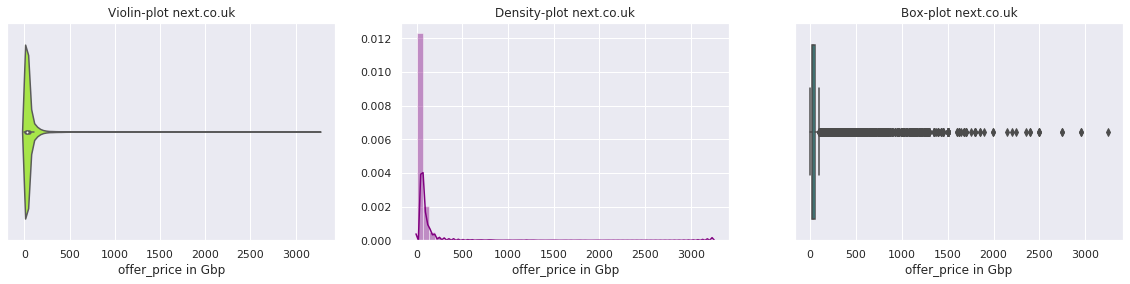

In [0]:
print("Min price on next.co.uk = {}".format(min(next_co_uk['actual_price'].values)))
print("Max price on next.co.uk = {}".format(max(next_co_uk['actual_price'].values)))

print("Average pricing on next.co.uk is ", average(next_co_uk['actual_price'].tolist()))
print("Standard deviation is of {}\n".format(standard_deviation(next_co_uk['actual_price'].tolist())))
price_analysis(next_co_uk,price_type='offer_price', name="next.co.uk")    

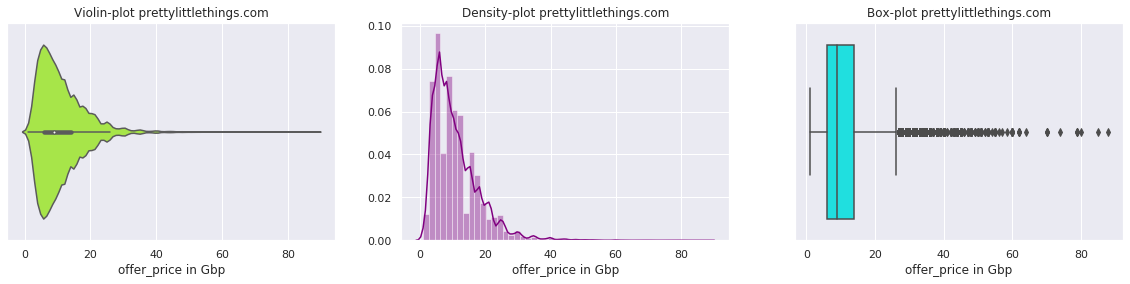

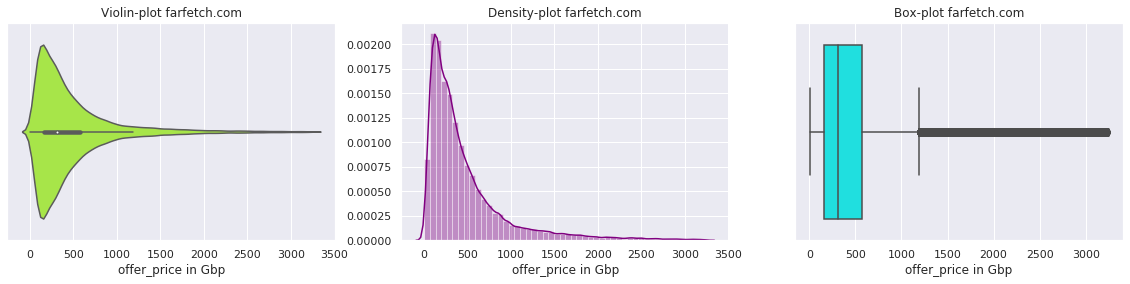

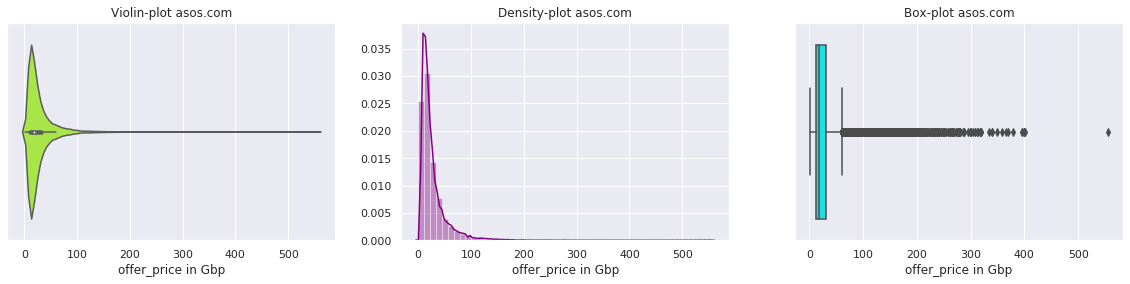

In [0]:
# comparing product pricing of next.co.uk with other websites, with max pice cap of 3250
price_cap = 3250
d1 = prettylittlethings.loc[prettylittlethings['offer_price']<price_cap].reset_index(drop=True)
d2 = farfetch.loc[farfetch['offer_price']<price_cap].reset_index(drop=True)
d3 = asos.loc[asos['offer_price']<price_cap].reset_index(drop=True)

price_analysis(d1,price_type = 'offer_price', name="prettylittlethings.com")
price_analysis(d2,price_type='offer_price', name="farfetch.com")
price_analysis(d3,price_type='offer_price', name="asos.com")

    Looking at the above plots for pricing on next.co.uk, we can observe that farfetch.com and asos.com have products in 75% quartile 
    range of products on next.co.uk. It would be interesting to see the offers by these brands similar price range. 



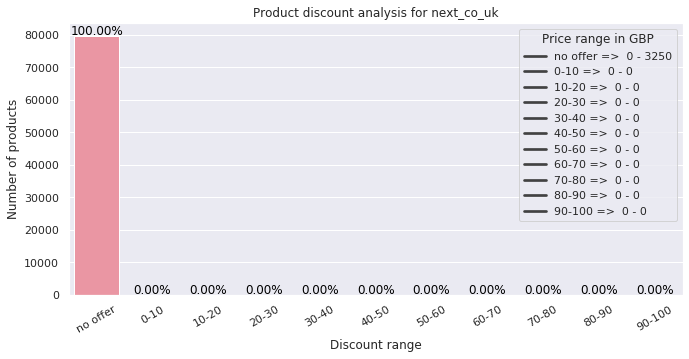

In [0]:
offer_analysis(next_co_uk,"next_co_uk", size=[11,5])

    There are no products on offer on next.co.uk

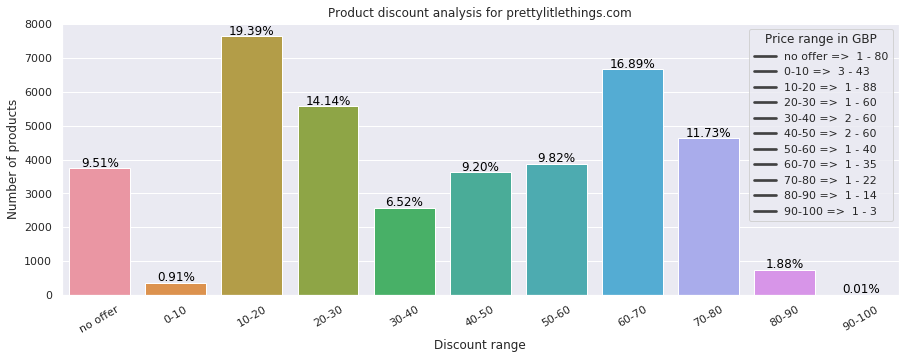

In [0]:
offer_analysis(d1, "prettylitlethings.com", size=[15,5])

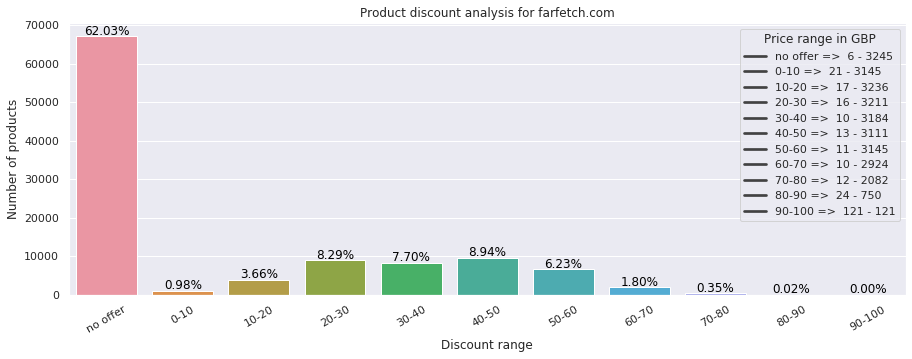

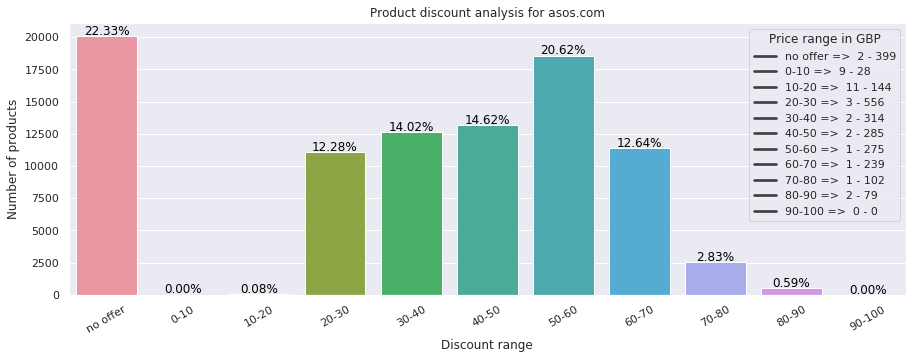

In [0]:
offer_analysis(d2,"farfetch.com", size=[15,5])
offer_analysis(d3,"asos.com", size=[15,5])

    As next.co.uk does'nt offer any discount, we can see that farfetch.com gives discount of 38% of its products, while asos 
    gives discount on 77% of its product within same range as nex.co.uk. Let's see if there is any difference significant 
    difference b/w the product brands and there name. 

Total number of brands on next.co.uk =  778
Total number of brands on prettylittlething.com within price range of 0-3250 =  667
Total number of brands on frafetch.com within price range of 0-3250 =  2742
Total number of brands on asos.com within price range of 0-3250 = 809
 


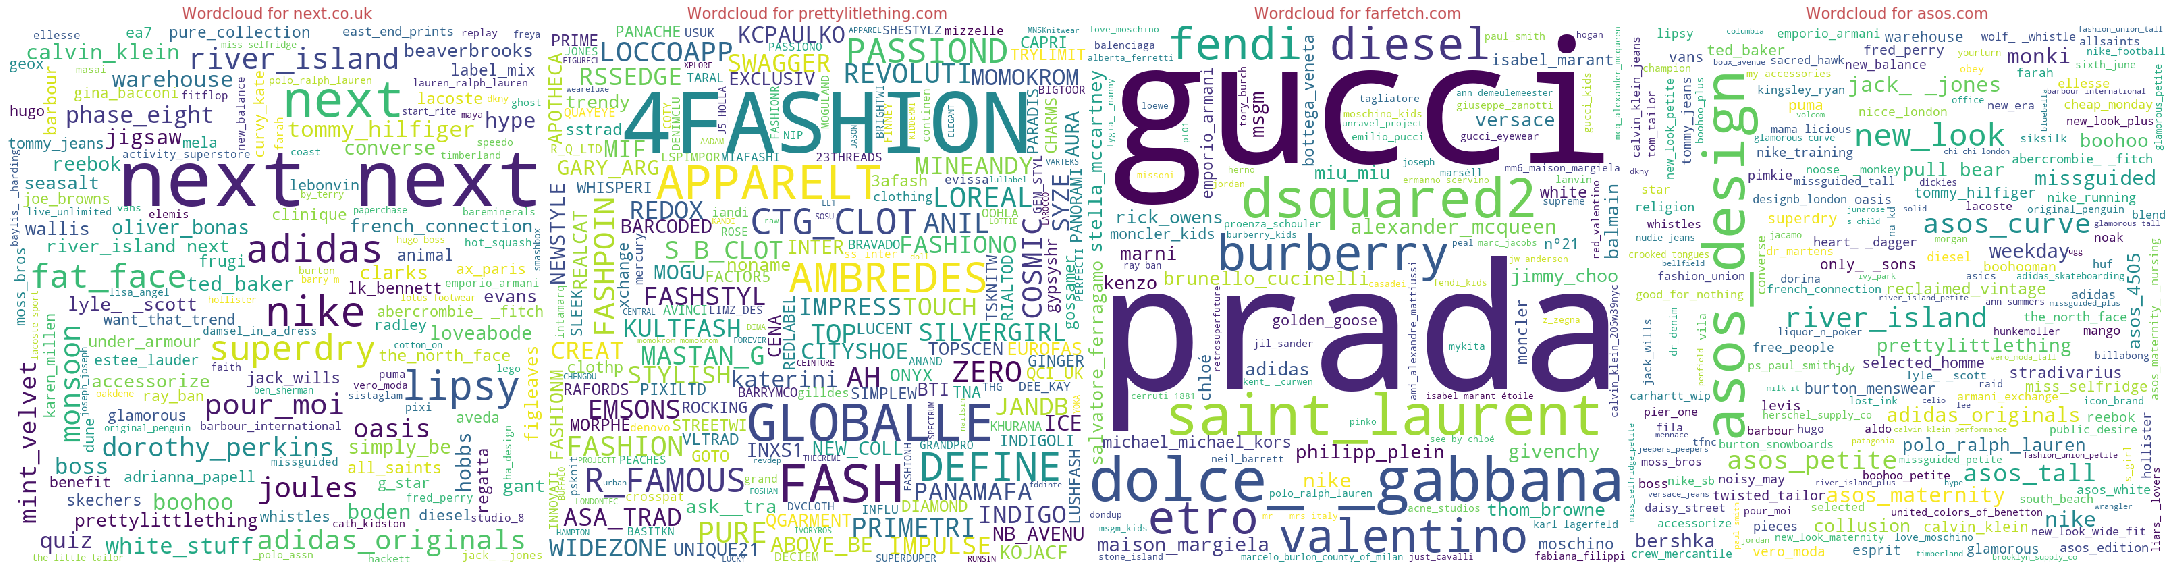

number of common brand b/w next.co.uk and prettylittlething.com = 8
number of common brand b/w next.co.uk and farfetch.com = 61
number of common brand b/w next.co.uk and asos.com = 161



In [0]:
brand = next_co_uk['brand_name'].tolist()
brand_1 = d1['brand_name'].tolist() # brands on prettylitlething.com within similar price range
brand_2 = d2['brand_name'].tolist() # brands on farfetch.com within similar price range
brand_3 = d3['brand_name'].tolist()   # brands on asos.com within similar price range

print("Total number of brands on next.co.uk = ", len(Counter(brand)))
print("Total number of brands on prettylittlething.com within price range of 0-3250 = ", len(Counter(brand_1)))
print("Total number of brands on frafetch.com within price range of 0-3250 = ", len(Counter(brand_2)))
print("Total number of brands on asos.com within price range of 0-3250 = {}\n ".format(len(Counter(brand_3))))

cb_1 = [i for i in brand if i in brand_1]   # common brands b/w next.co.uk and prettylitlething.com
cb_2 = [i for i in brand if i in brand_2]   # common brands b/w next.co.uk and farfetch.com
cb_3 = [i for i in brand if i in brand_3]   # common brands b/w next.co.uk and asos.com

word_cloud([brand,brand_1, brand_2, brand_3], title=["next.co.uk", 'prettylitlething.com',"farfetch.com", 'asos.com'], size=[30,8])

print("number of common brand b/w next.co.uk and prettylittlething.com = {}".format(len(Counter(cb_1))))
print("number of common brand b/w next.co.uk and farfetch.com = {}".format(len(Counter(cb_2))))
print("number of common brand b/w next.co.uk and asos.com = {}\n".format(len(Counter(cb_3))))


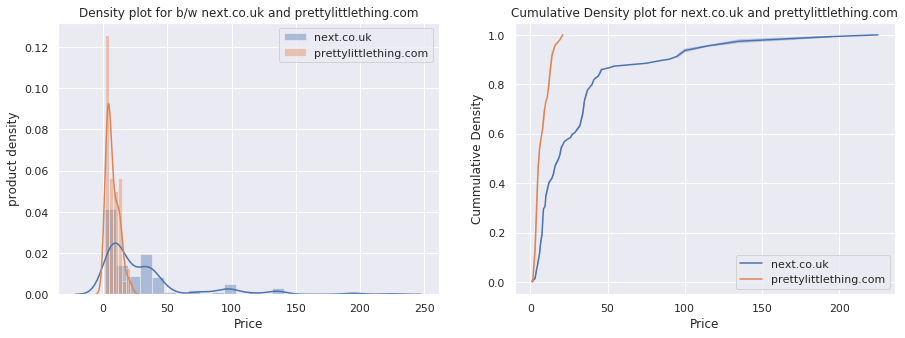

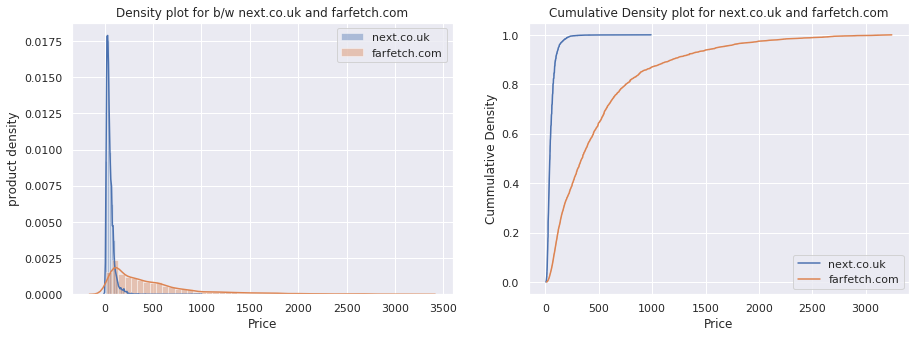

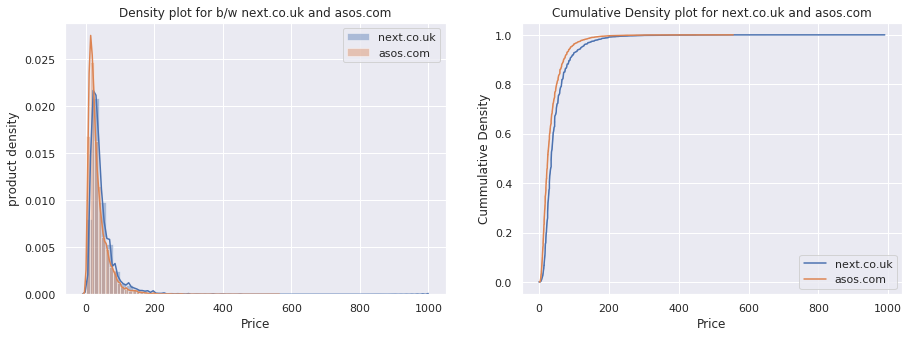

In [0]:
# price comparison b/w the websites on common listed brands
density_plot_comparison(data=[next_co_uk, d1], common_brand=cb_1, website_name=['next.co.uk', 'prettylittlething.com'])
density_plot_comparison(data=[next_co_uk, d2], common_brand=cb_2, website_name=['next.co.uk', 'farfetch.com'])
density_plot_comparison(data=[next_co_uk, d3], common_brand=cb_3, website_name=['next.co.uk', 'asos.com'])

    Looking at the density plot we can say that on pricing of common brands next.co.uk is having higher price than products in 
    prettylittlething.com, lesser price than farfetch.com, and have almost same pricing as in asos.com. It would be intresting to see
    what products are on offers from common brands on these sites.

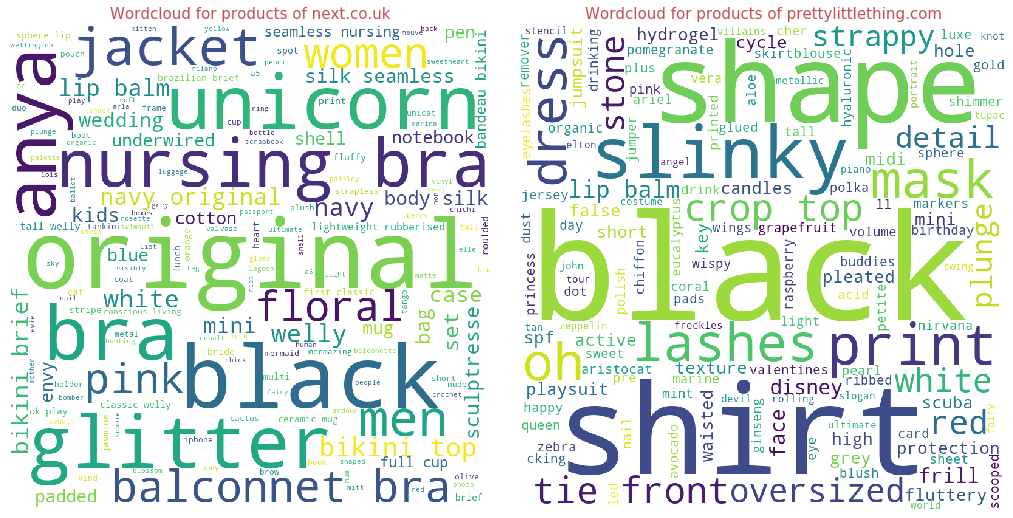

In [0]:
# compairing product name of next.co.uk and prettylittlething.com
# getting product names form common brand
product_name = cb_data(next_co_uk, cb_1)['product_name'].tolist()
product_name_ = cb_data(d1,cb_1)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of next.co.uk", "products of prettylittlething.com"])

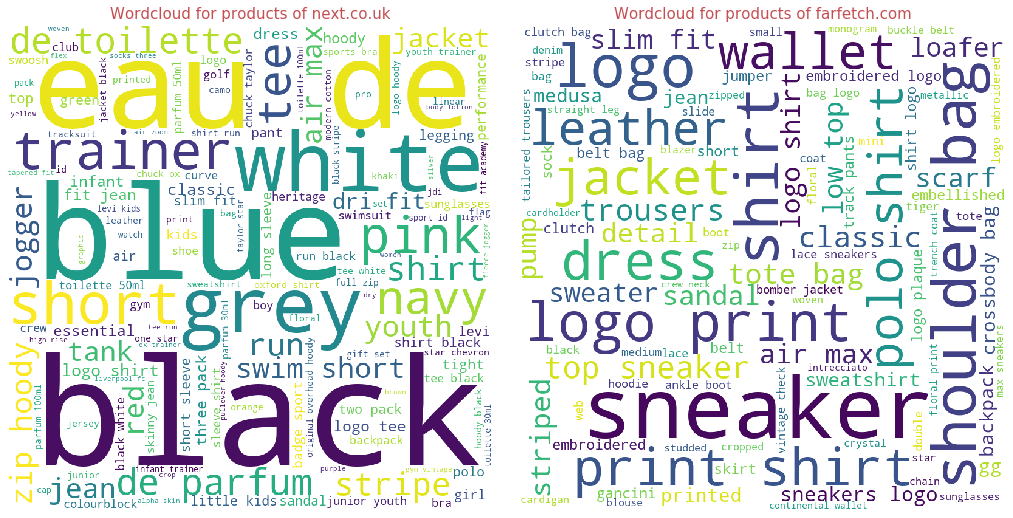

In [0]:
# compairing product name of next.co.uk and farfetch.com
# getting product names form common brand
product_name = cb_data(next_co_uk, cb_2)['product_name'].tolist()
product_name_ = cb_data(d2, cb_2)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of next.co.uk",'products of farfetch.com'])

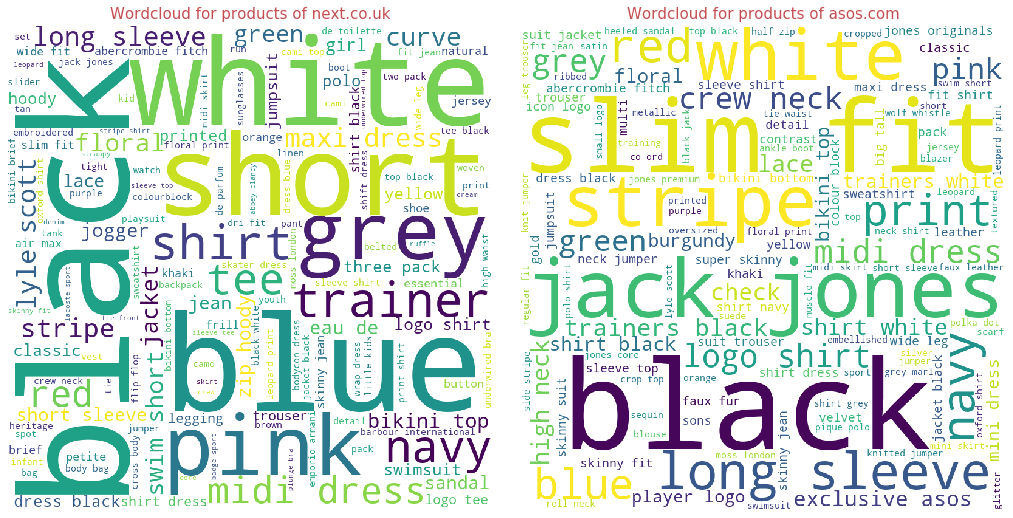

In [0]:
# compairing product name of next.co.uk and asos.com
# getting product names form common brand
product_name = cb_data(next_co_uk, cb_3)['product_name'].tolist()
product_name_ = cb_data(d3, cb_3)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of next.co.uk",'products of asos.com'])

## **prettylittlething**.**com**

Min price on prettylittlethings.com = 1.0
Max price on prettylittlethings.com = 88.0
Average pricing on prettylittlethings is  10.85
Standard deviation is of 115.07



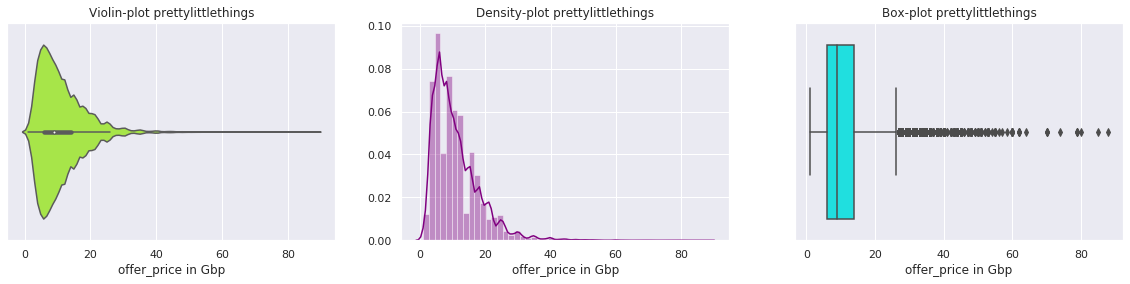

In [0]:
print("Min price on prettylittlethings.com = {}".format(min(prettylittlethings['offer_price'].values)))
print("Max price on prettylittlethings.com = {}".format(max(prettylittlethings['offer_price'].values)))

print("Average pricing on prettylittlethings is ", average(prettylittlethings['offer_price'].tolist()))
print("Standard deviation is of {}\n".format(standard_deviation(prettylittlethings['offer_price'].tolist())))

price_analysis(prettylittlethings,price_type='offer_price', name="prettylittlethings")

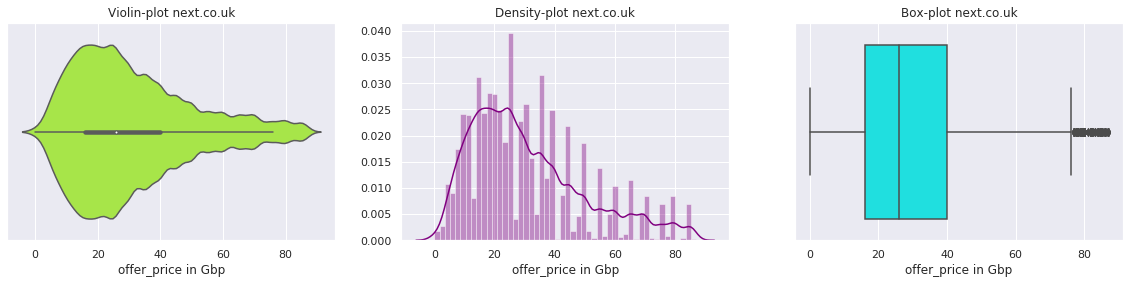

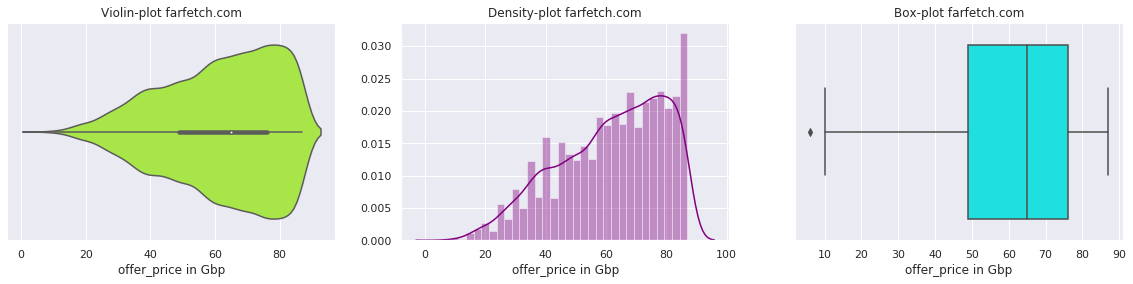

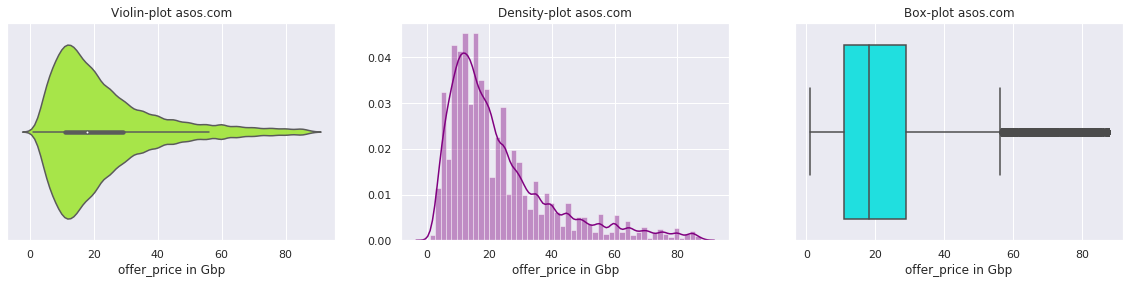

In [0]:
# comparing product pricing of next.co.uk with other websites, with max price cap of 88
price_cap = 88
d1 = next_co_uk.loc[next_co_uk['offer_price']<price_cap].reset_index(drop=True)
d2 = farfetch.loc[farfetch['offer_price']<price_cap].reset_index(drop=True)
d3 = asos.loc[asos['offer_price']<price_cap].reset_index(drop=True)

price_analysis(d1,price_type = 'offer_price', name="next.co.uk")
price_analysis(d2,price_type='offer_price', name="farfetch.com")
price_analysis(d3,price_type='offer_price', name="asos.com")

    Looking at the above plots we can see that all webites have there products in the price range as of prettlylittlething.com
    it is necessary to analyis there offers

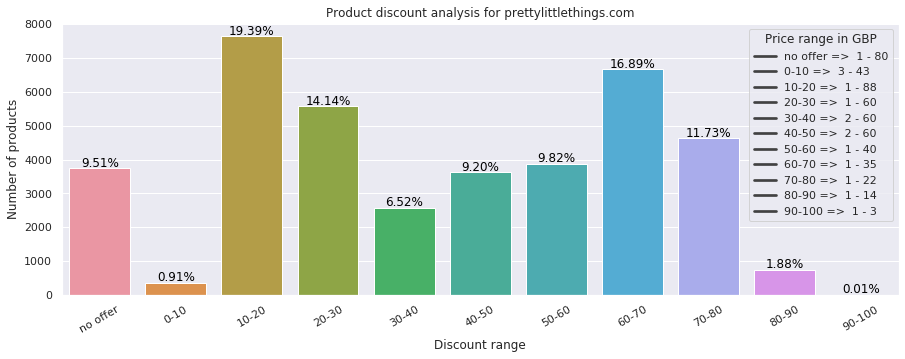

In [0]:
offer_analysis(prettylittlethings, "prettylittlethings.com", size=[15,5])

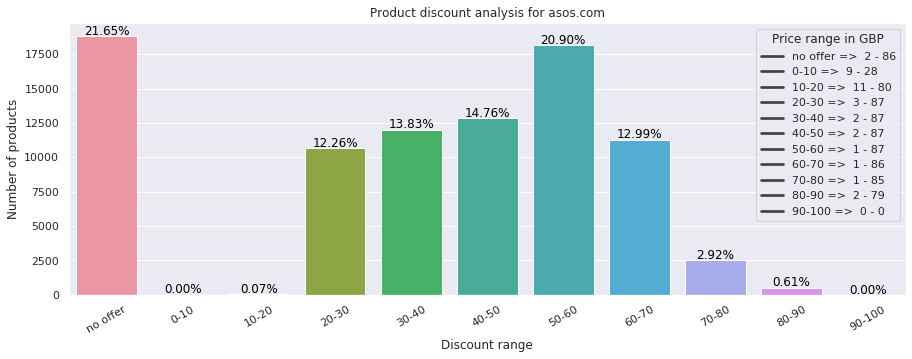

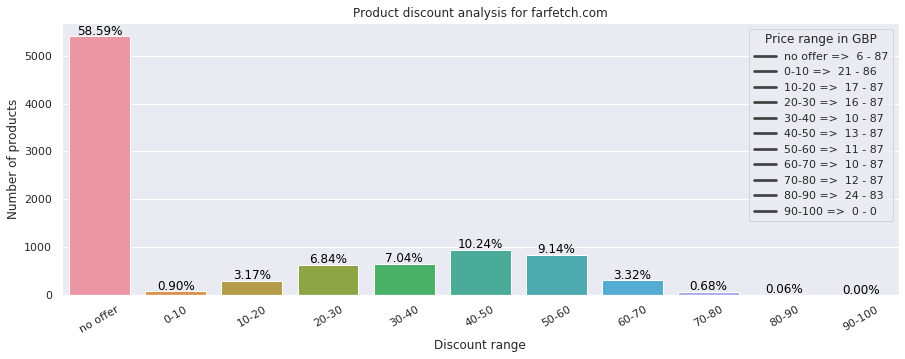

In [0]:
# not comparing next.co.uk as it do not have any discount
offer_analysis(d3, "asos.com", size=[15,5])
offer_analysis(d2, "farfetch.com", size=[15,5])

    Based on the above bar plot we can see that prettylittlething.com has more than 85% of the product in discount range of 20-70%, 
    compared to other sites it is giving higher discount.

Total number of brands on prettylittlethings =  667
Total number of brands on next.co.uk within price range of 0-88 =  743
Total number of brands on farfetch.com within price range of 0-88 = 910 
Total number of brands on asos.com within price range of 0-88 = 786
 


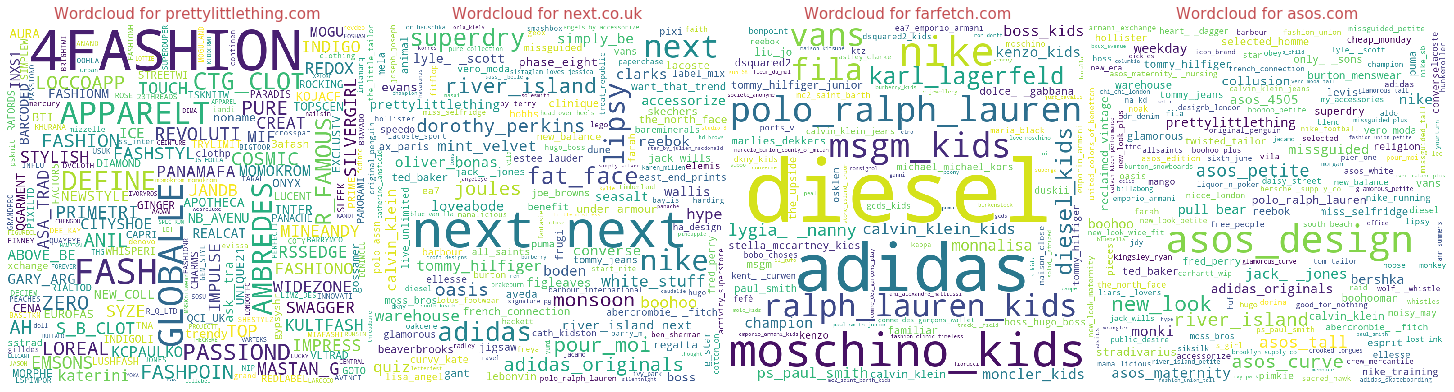

number of common brand b/w prettylittlethings.com and next.co.uk = 49
number of common brand b/w prettylittlethings and farfetch.com = 2
number of common brand b/w prettylittlethings and asos.com = 50



In [0]:
brand = prettylittlethings['brand_name'].tolist()
brand_1 = d1['brand_name'].tolist() # brands on next.co.uk within similar price range
brand_2 = d2['brand_name'].tolist()   # brands on farfetch.com within similar price range
brand_3 = d3['brand_name'].tolist()   # brands on asos.com within similar price range

print("Total number of brands on prettylittlethings = ", len(Counter(brand)))
print("Total number of brands on next.co.uk within price range of 0-88 = ", len(Counter(brand_1)))
print("Total number of brands on farfetch.com within price range of 0-88 = {} ".format(len(Counter(brand_2))))
print("Total number of brands on asos.com within price range of 0-88 = {}\n ".format(len(Counter(brand_3))))

cb_1 = [i for i in brand if i in brand_1]   #common brands on next.co.uk within similar price range
cb_2 = [i for i in brand if i in brand_2]   # common brands on farfetch.com within similar price range
cb_3 = [i for i in brand if i in brand_3]  #common brands on asos.com within similar price range

word_cloud([brand,brand_1, brand_2, brand_3], title=["prettylittlething.com", 'next.co.uk',"farfetch.com", 'asos.com'], size=[20,6])
print("number of common brand b/w prettylittlethings.com and next.co.uk = {}".format(len(cb_1)))
print("number of common brand b/w prettylittlethings and farfetch.com = {}".format(len(cb_2)))
print("number of common brand b/w prettylittlethings and asos.com = {}\n".format(len(cb_3)))

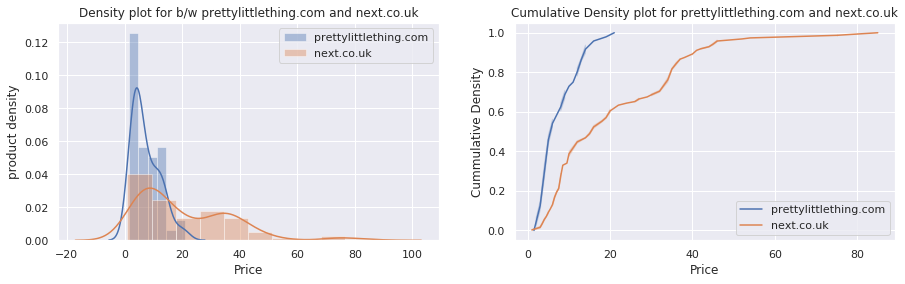

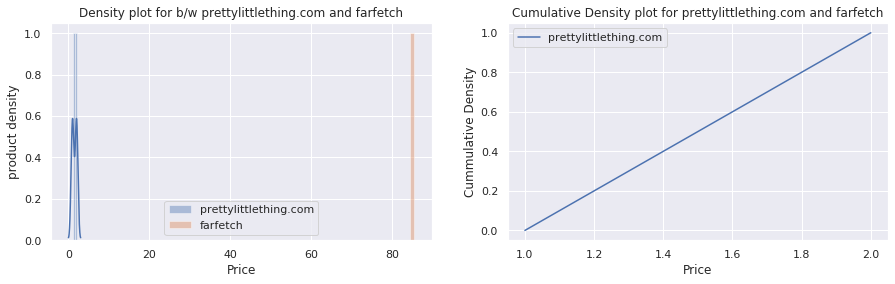

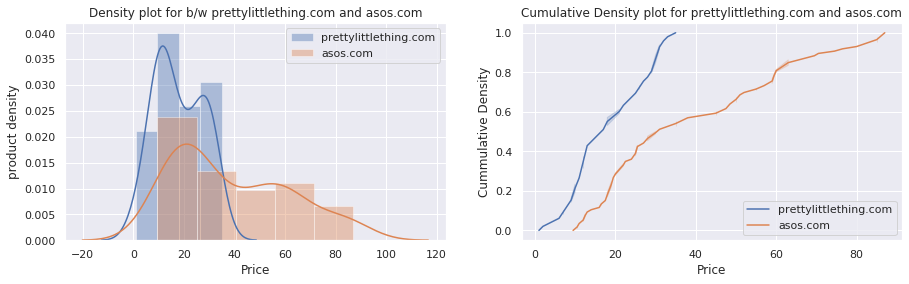

In [0]:
density_plot_comparison(data=[prettylittlethings, d1], common_brand=cb_1, website_name=['prettylittlething.com', 'next.co.uk'])
density_plot_comparison(data=[prettylittlethings, d2], common_brand=cb_2, website_name=['prettylittlething.com', 'farfetch'])
density_plot_comparison(data=[prettylittlethings, d3], common_brand=cb_3, website_name=['prettylittlething.com', 'asos.com'])

    Based on the above plots

*   Observing first plot we can see that all of the offers on prettylitlethings.com are applied on products in price range 0-20, while on next.co.uk 60% of the products is within that range.
*  There are not many brands to compare.
*  Observing third plot we can see that offers on prettylitlethings.com are applied on products in price range 0-40, while on asos.com 60% of the products is within that range. 



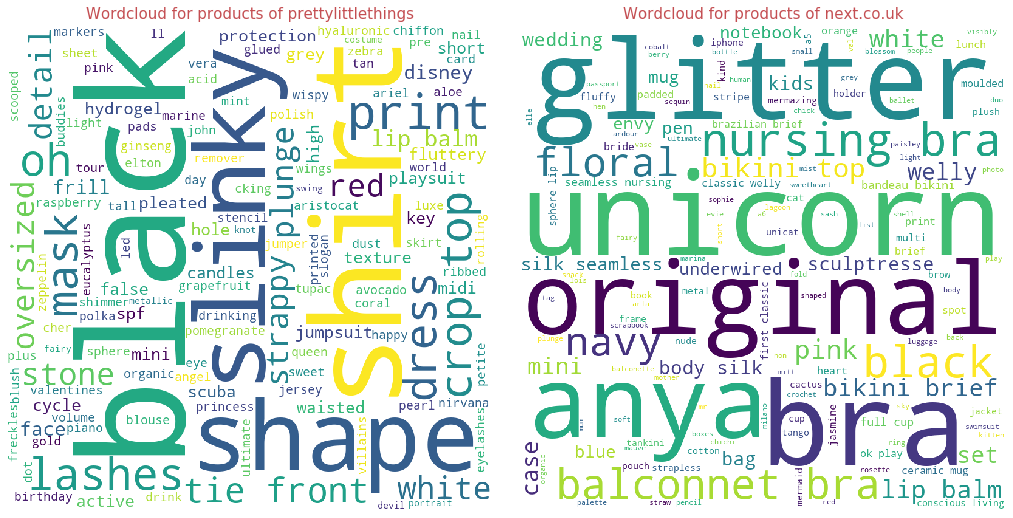

In [0]:
#  wordcloud for product name with price range of 0-88
product_name = cb_data(prettylittlethings, cb_1)['product_name'].tolist()
product_name_ = cb_data(d1, cb_1)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of prettylittlethings",'products of next.co.uk'])

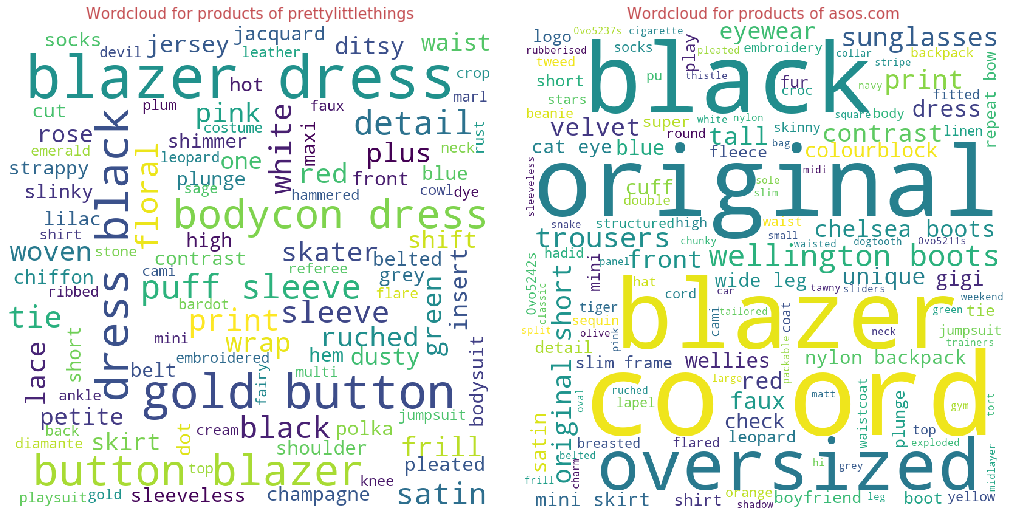

In [0]:
#  wordcloud for product name with price range of 0-88
product_name = cb_data(prettylittlethings, cb_3)['product_name'].tolist()
product_name_ = cb_data(d3, cb_3)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of prettylittlethings",'products of asos.com'])

## **farfetch**.**com**

Min price on farfetch.com = 6.0
Max price on farfetch.com = 1026484.0

Average pricing on farfetch is  582.83
Standard deviation is of 115.07


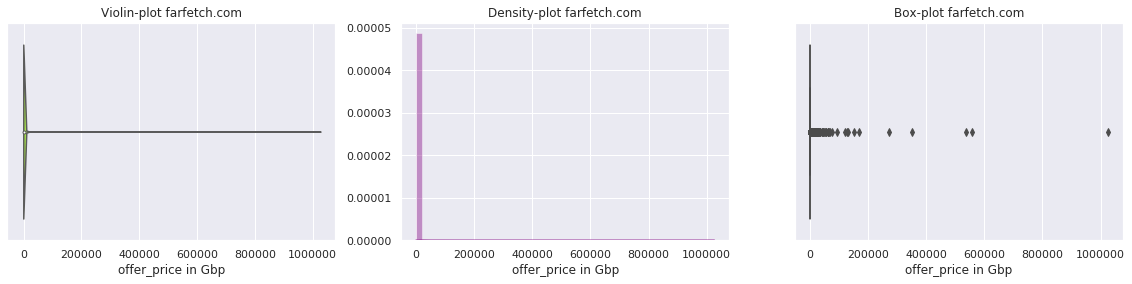

In [0]:
print("Min price on farfetch.com = {}".format(min(farfetch['offer_price'].values)))
print("Max price on farfetch.com = {}".format(max(farfetch['offer_price'].values)))
print("\nAverage pricing on farfetch is ", average(farfetch['offer_price'].tolist()))
print("Standard deviation is of {}".format(standard_deviation(farfetch['offer_price'].tolist())))

price_analysis(farfetch,price_type='offer_price', name="farfetch.com")

    Looking at the above plot can see there are very few points beyond 200000. Although its a pirce on shopping site whcih generally 
    follows pareto distribution. But these are really high prices and should be omitted for further analysis. 
    Also we can observe the pricing of this site is quit high therefore we need to consider only those products which are in same 
    price range of other websites.

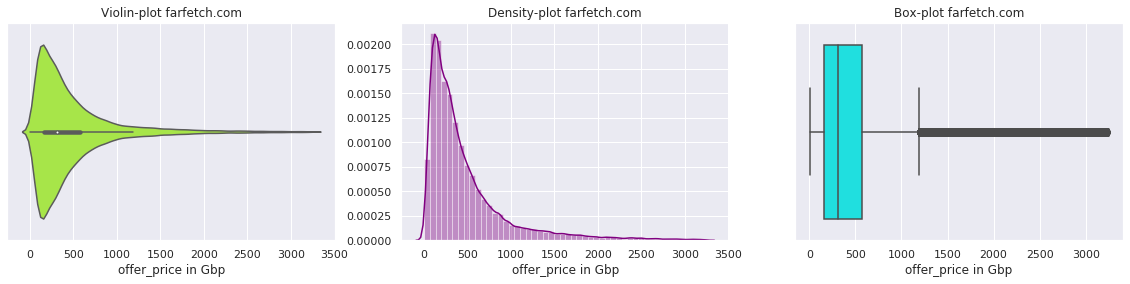

In [0]:
# finding the max price range of other websites and capping max price for products at farfetch.com
temp=[]
temp.append(max(next_co_uk['offer_price'].values))
temp.append(max(prettylittlethings['offer_price'].values))
temp.append(max(asos['offer_price'].values))
price_cap = max(temp)

farfetch_capped = farfetch.loc[farfetch['offer_price']<price_cap].reset_index(drop=True)
price_analysis(farfetch_capped,price_type='offer_price', name="farfetch.com")


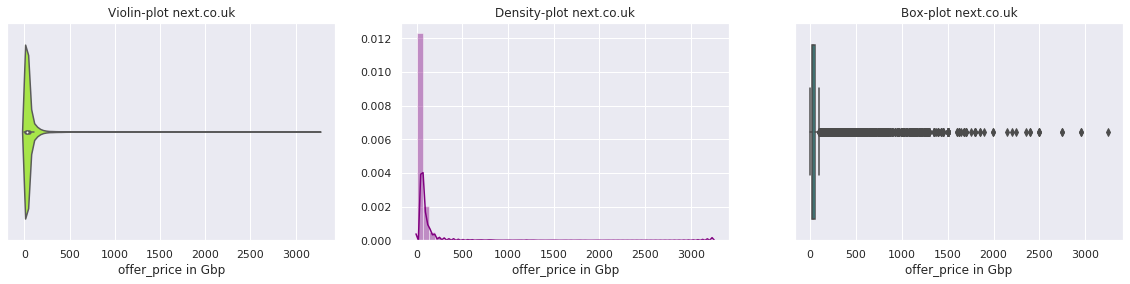

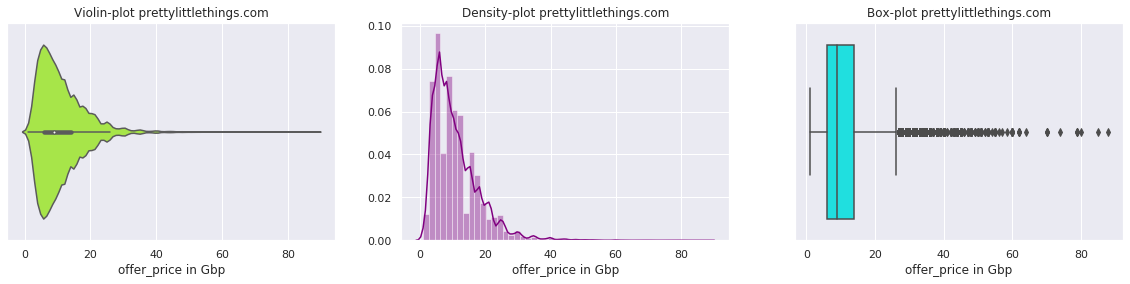

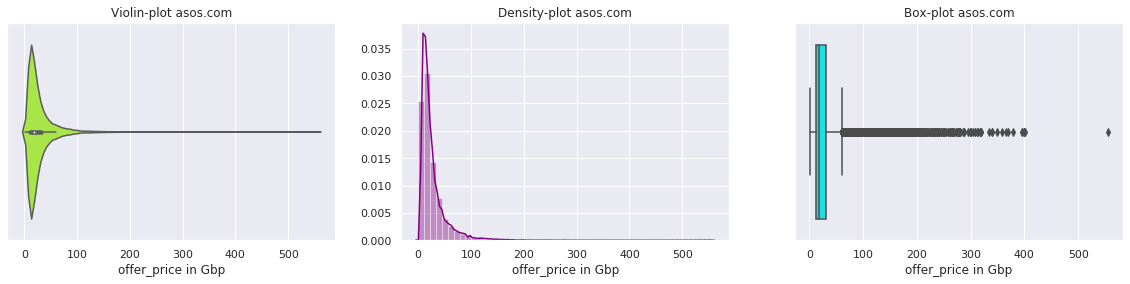

In [0]:
d1 = next_co_uk
d2 = prettylittlethings
d3 = asos

price_analysis(d1,price_type = 'offer_price', name="next.co.uk")
price_analysis(d2,price_type='offer_price', name="prettylittlethings.com")
price_analysis(d3,price_type='offer_price', name="asos.com")

    By observing the above plots we can see price disparity between farfetch.com and other websites. This means farfetch 
    is the website for higher priced products therefore it may have less discount as well as less number of products in same prices 
    range as others.

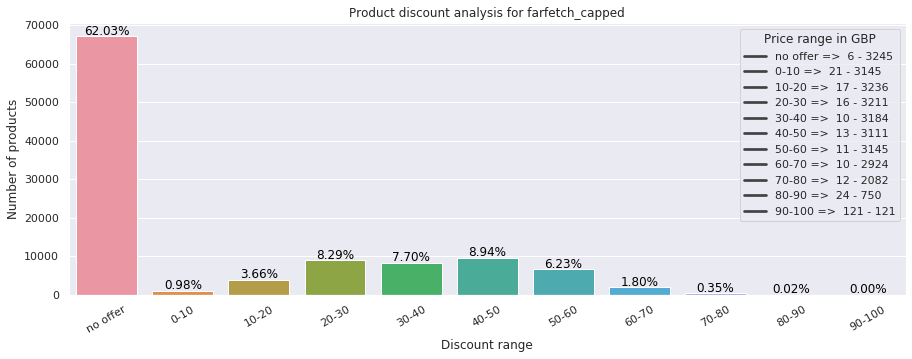

In [0]:
offer_analysis(farfetch_capped, "farfetch_capped", size=[15,5])

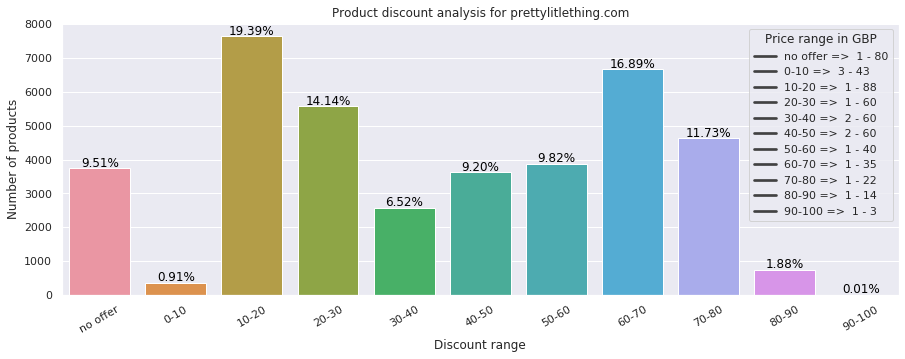

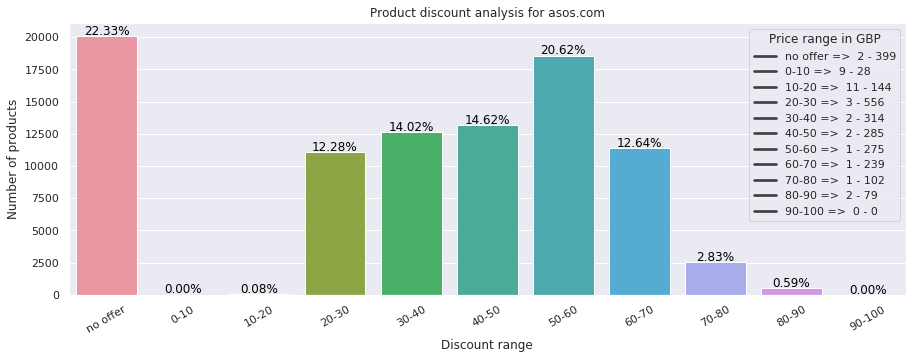

In [0]:
offer_analysis(d2, "prettylitlething.com", size=[15,5])
offer_analysis(d3, "asos.com", size=[15,5])

    The 62% of the products within the range 0-3250 gbp are not on offer on farfetch.com, compared to others two sites, 
    the offers are certainly low.

Total number of brands on farfetch.com =  2742
Total number of brands on next.co.uk within price range of 0-3250 = 778
 
Total number of brands on prettylitlething.com within price range of 0-3250 =  667
Total number of brands on asos.com within price range of 0-3250 = 809
 


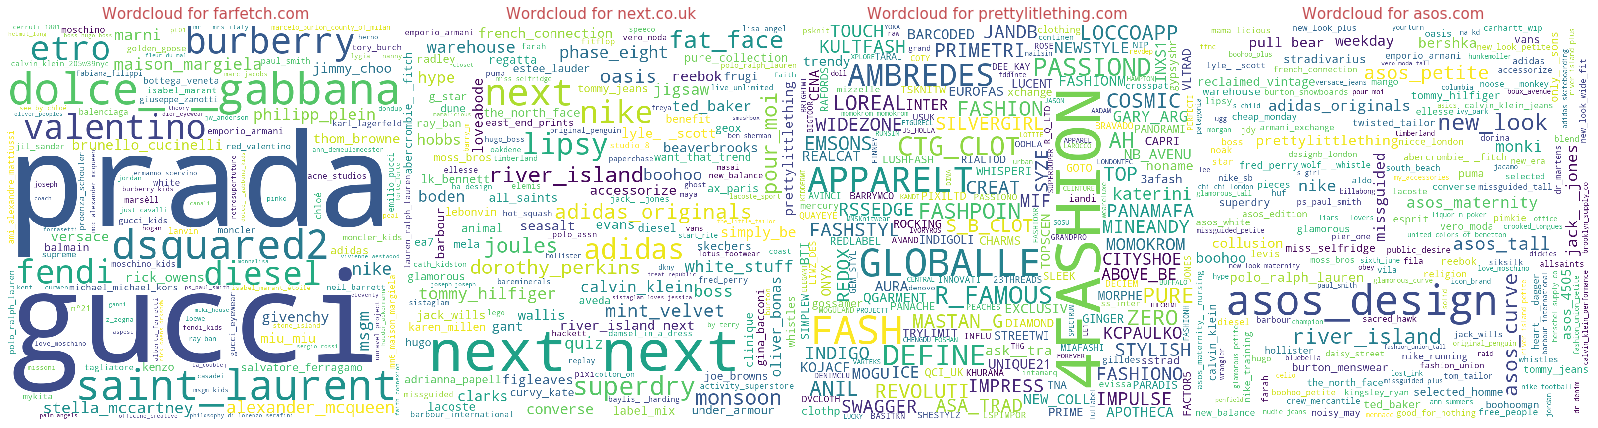

number of common brand b/w  farfetch.com and next.co.uk = 61
number of common brand b/w farfetch.com and prettylitlething.com = 1

number of common brand b/w farfetch.com and asos.com = 81



In [0]:
brand = farfetch_capped['brand_name'].tolist()
brand_1 = d1['brand_name'].tolist() # brands on next.co.uk within similar price range
brand_2 = d2['brand_name'].tolist()   # brands on prettylitlething.com within similar price range
brand_3 = d3['brand_name'].tolist()   # brands on asos.com within similar price range

print("Total number of brands on farfetch.com = ", len(Counter(brand)))
print("Total number of brands on next.co.uk within price range of 0-3250 = {}\n ".format(len(Counter(brand_1))))
print("Total number of brands on prettylitlething.com within price range of 0-3250 = ", len(Counter(brand_2)))
print("Total number of brands on asos.com within price range of 0-3250 = {}\n ".format(len(Counter(brand_3))))

cb_1 = [i for i in brand if i in brand_1]
cb_2 = [i for i in brand if i in brand_2]
cb_3 = [i for i in brand if i in brand_3]  

word_cloud([brand,brand_1, brand_2, brand_3], title=[ "farfetch.com",'next.co.uk','prettylitlething.com', 'asos.com', ], size = [22,6])

print("number of common brand b/w  farfetch.com and next.co.uk = {}".format(len(Counter(cb_1))))
print("number of common brand b/w farfetch.com and prettylitlething.com = {}\n".format(len(Counter(cb_2))))
print("number of common brand b/w farfetch.com and asos.com = {}\n".format(len(Counter(cb_3))))


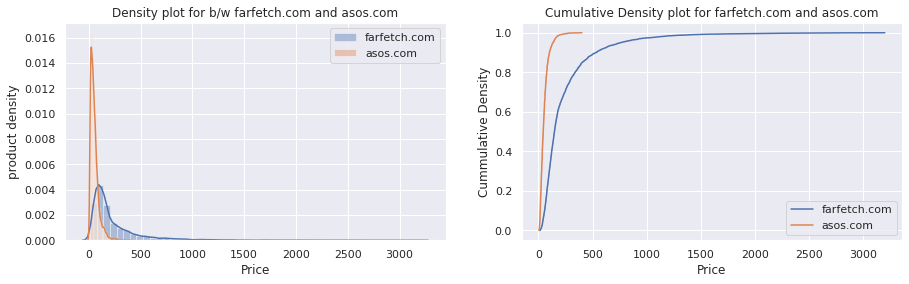

In [0]:
# for comparison with prettylittlethings and next.co.uk we can look into above cells 
density_plot_comparison(data=[farfetch_capped, d3], common_brand=cb_3, website_name=[ 'farfetch.com', 'asos.com'])

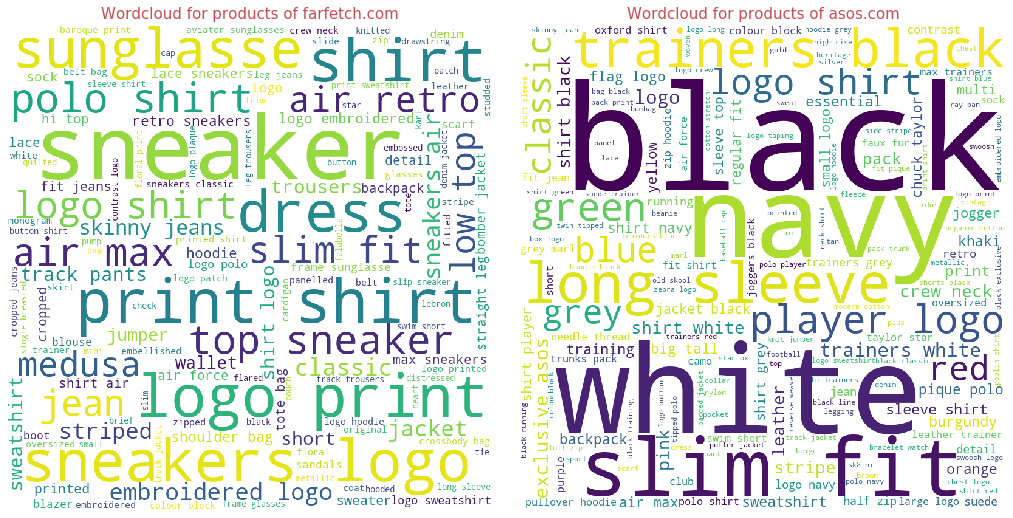

In [0]:
product_name = cb_data(farfetch_capped, cb_3)['product_name'].tolist()
product_name_ = cb_data(d3, cb_3)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of farfetch.com", "products of asos.com"])

### **asos**.**com**

Min price on asos.com = 1.0
Max price on asos.com = 556.0

Average pricing on farfetch is  26.53
Standard deviation is of 115.07


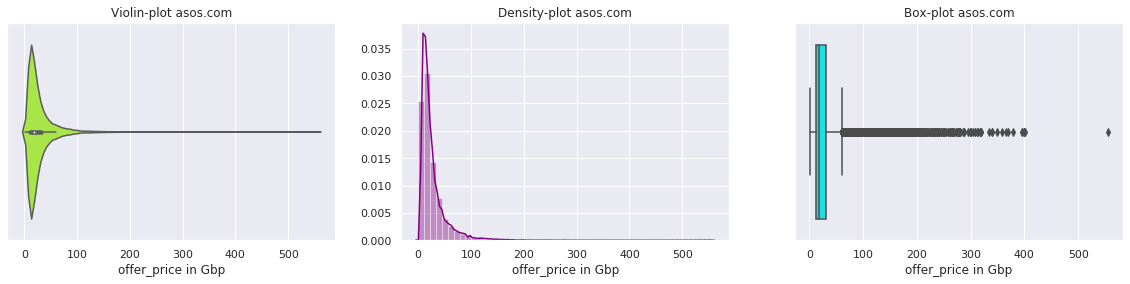

In [0]:
print("Min price on asos.com = {}".format(min(asos['offer_price'].values)))
print("Max price on asos.com = {}".format(max(asos['offer_price'].values)))

print("\nAverage pricing on farfetch is ", average(asos['offer_price'].tolist()))
print("Standard deviation is of {}".format(standard_deviation(asos['offer_price'].tolist())))

price_analysis(asos,price_type='offer_price', name="asos.com")

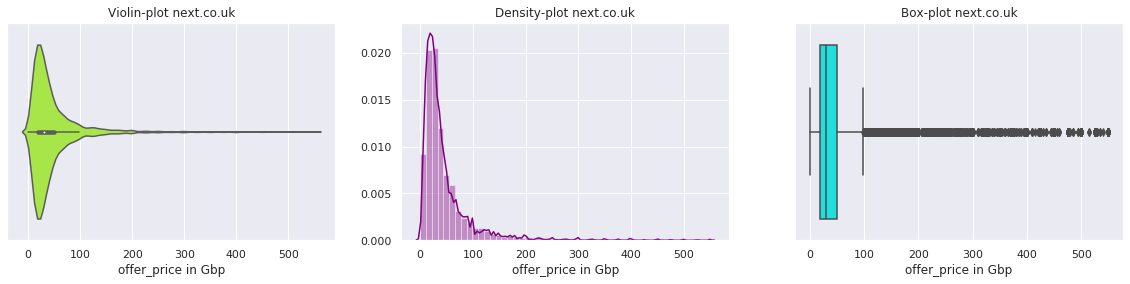

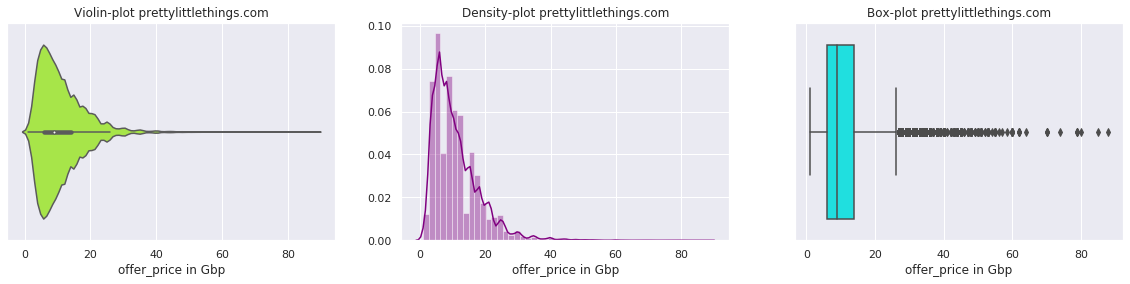

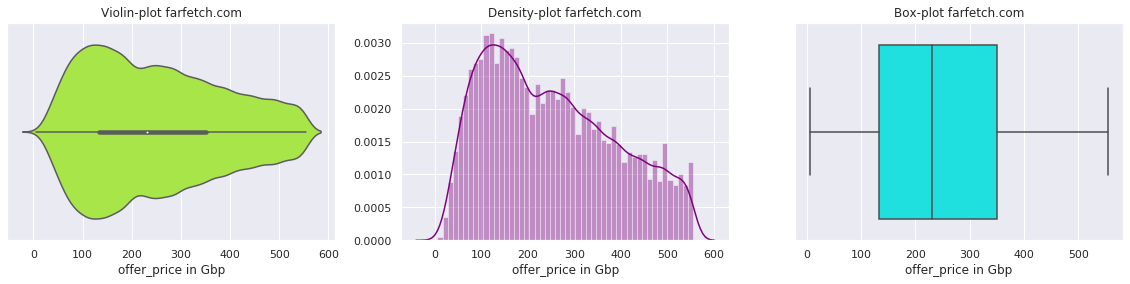

In [0]:
price_cap = 556
d1 = next_co_uk.loc[next_co_uk['offer_price']<price_cap].reset_index(drop=True)
d2 = prettylittlethings.loc[prettylittlethings['offer_price']<price_cap].reset_index(drop=True)
d3 = farfetch.loc[farfetch['offer_price']<price_cap].reset_index(drop=True)

price_analysis(d1,price_type = 'offer_price', name="next.co.uk")
price_analysis(d2,price_type='offer_price', name="prettylittlethings.com")
price_analysis(d3,price_type='offer_price', name="farfetch.com")

    Looking at the above plots we can see that next.co.uk and prettylitlething.com have the similar price 
    range for most of there products, while ferfetch.com has price centered at the higher price.

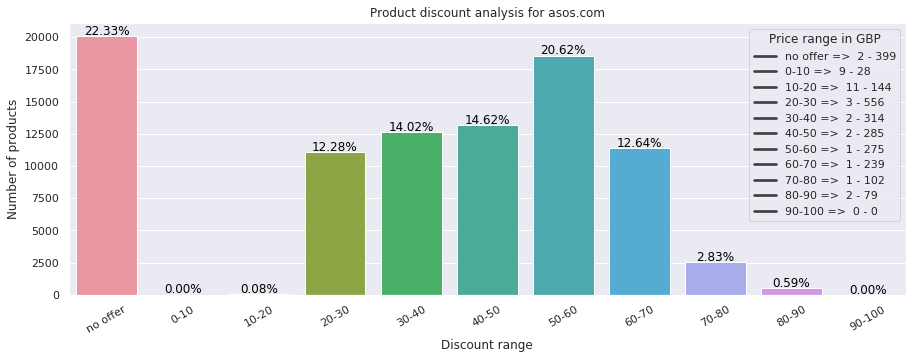

In [0]:
offer_analysis(asos, "asos.com", size=[15,5])

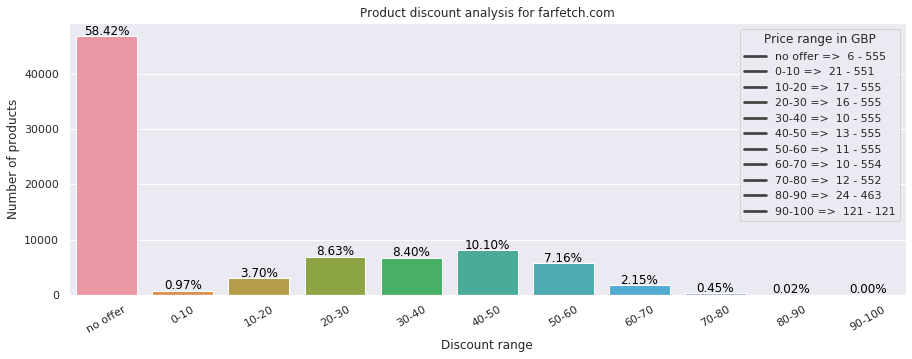

In [0]:
offer_analysis(d3, "farfetch.com", size=[15,5])

    If we comapare discount and there price range we can observe that asos.com is having about 75% of products on offer in  range 20-70, 
    but the farfetch is having just 32% of product in this range. Its nearest compatetor next.co.uk doesn't have any offer.

Total number of brands on asos.com =  809
Total number of brands on next.co.uk within price range of 0-556 = 778 
Total number of brands on prettylitlething.com within price range of 0-556 =  667
Total number of brands on farfetch.com within price range of 0-556 = 2487
 


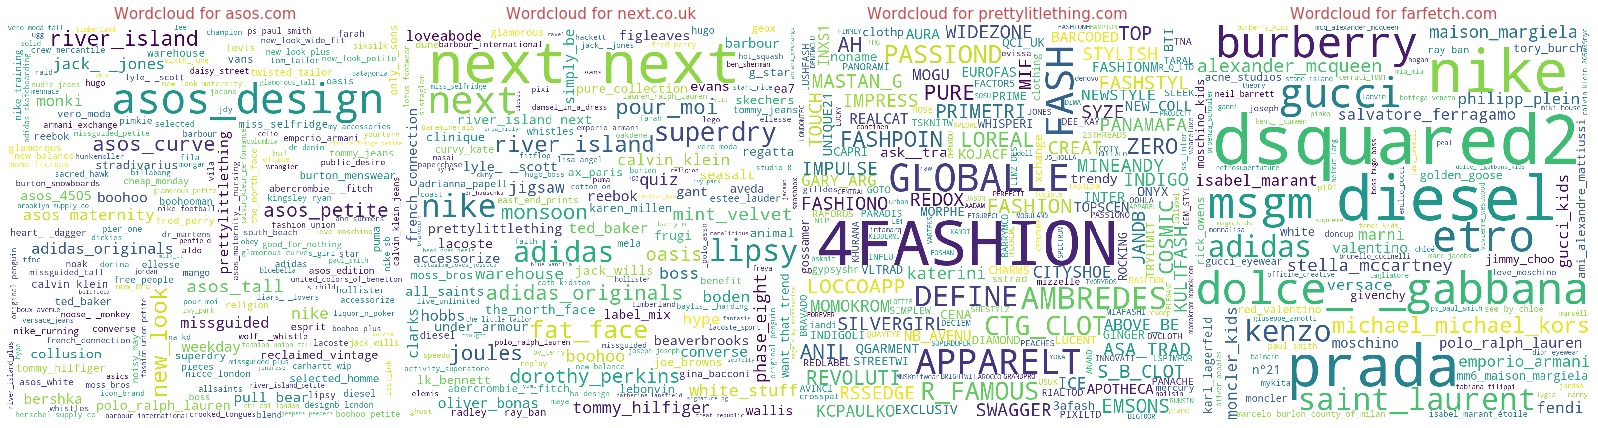

number of common brand b/w  asos.com and next.co.uk = 161
number of common brand b/w asos.com and prettylitlething.com = 5
number of common brand b/w asos.com and farfetch.com = 81



In [0]:
brand = asos['brand_name'].tolist()
brand_1 = d1['brand_name'].tolist() # brands on next.co.uk within similar price range
brand_2 = d2['brand_name'].tolist()   # brands on prettylitlething.com within similar price range
brand_3 = d3['brand_name'].tolist()   # brands on asos.com within similar price range

print("Total number of brands on asos.com = ", len(Counter(brand)))
print("Total number of brands on next.co.uk within price range of 0-556 = {} ".format(len(Counter(brand_1))))
print("Total number of brands on prettylitlething.com within price range of 0-556 = ", len(Counter(brand_2)))
print("Total number of brands on farfetch.com within price range of 0-556 = {}\n ".format(len(Counter(brand_3))))

cb_1 = [i for i in brand if i in brand_1]
cb_2 = [i for i in brand if i in brand_2]
cb_3 = [i for i in brand if i in brand_3]  

word_cloud([brand,brand_1, brand_2, brand_3], title=[ 'asos.com','next.co.uk','prettylittlething.com', 'farfetch.com', ], size = [22,6])

print("number of common brand b/w  asos.com and next.co.uk = {}".format(len(Counter(cb_1))))
print("number of common brand b/w asos.com and prettylitlething.com = {}".format(len(Counter(cb_2))))
print("number of common brand b/w asos.com and farfetch.com = {}\n".format(len(Counter(cb_3))))


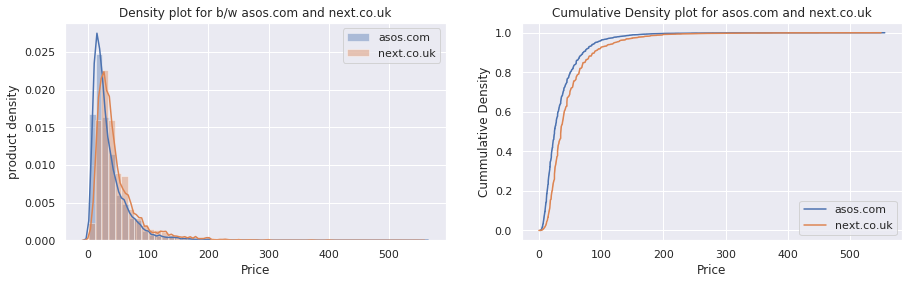

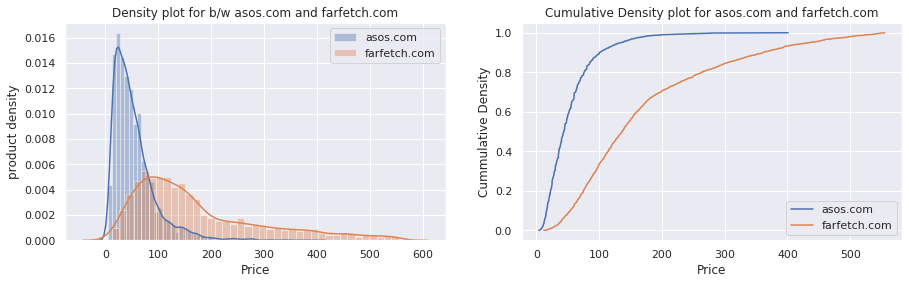

In [0]:
density_plot_comparison(data=[asos, d1], common_brand=cb_1, website_name=[ 'asos.com', 'next.co.uk'])
density_plot_comparison(data=[asos, d3], common_brand=cb_3, website_name=[ 'asos.com', 'farfetch.com'])

    In the price range 0-556 the prices of common brand on next.co.uk is competitive while with farfetch.com it
    seems asos.com has better pricing.

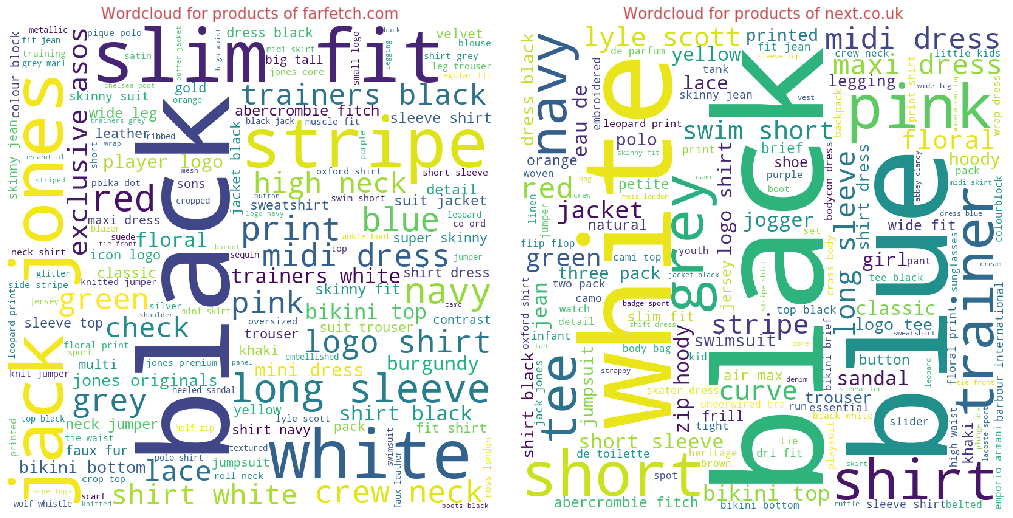

In [0]:
product_name = cb_data(asos, cb_1)['product_name'].tolist()
product_name_ = cb_data(d1, cb_1)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of farfetch.com", "products of next.co.uk"])

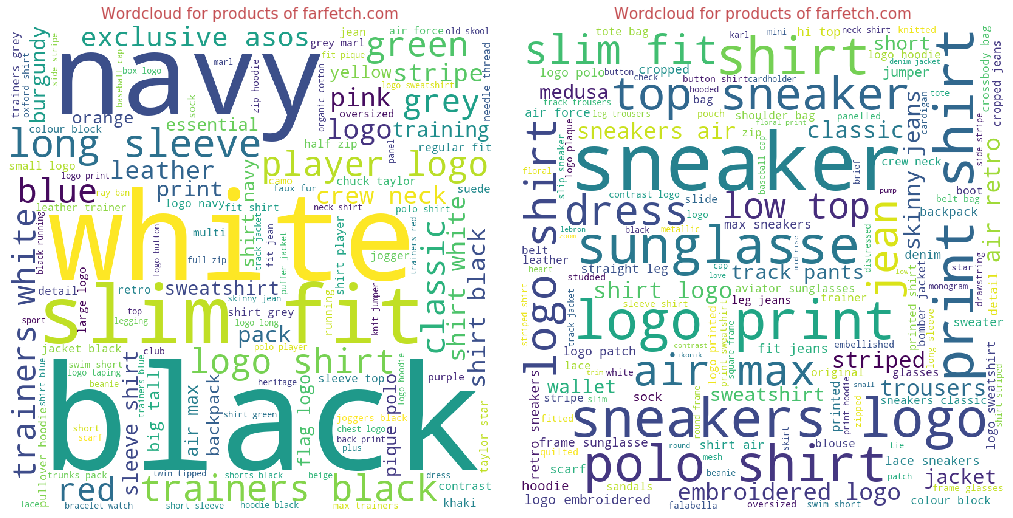

In [0]:
product_name = cb_data(asos, cb_3)['product_name'].tolist()
product_name_ = cb_data(d3, cb_3)['product_name'].tolist()
word_cloud([product_name,product_name_], title=["products of farfetch.com", "products of farfetch.com"])

# Final Conclusion

1.   Next.co.uk is not having any offers but the pricing of the products are competitive compared to farfetch.com and asos.com. But prices are quit higher when compared with prettylittlethings.com
2.   prettylitlething.com is offering highest discount among all. This website has listed low ranged products and has 90% of them on discount which suggest aggresive pricing whcih fares better than other sites.
3.   farfetch.com is website with products in higher price range therefore comparing it to other website products it is having higher pricing for even smame brand products. thefore it doesn't seems to be competing with other sites
4.   asos.com has the competitive pricing against prettylittlethings.com and next.co.uk with 77% of products on discount b/w 20-70%. It has the most balanced pricing considering the other websites.

